In [1]:
import os
os.chdir("../")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from src.run.run_pricing import run_pricing_multiple_times

In [4]:
run_pricing_multiple_times(test=True, quiet=True);

Pricing trajectories:   0%|          | 0/10 [00:00<?, ?it/s]

Pricing 1000 / 100000 (0 / 10)


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

Pricing 12000 / 100000 (1 / 10)


AMC price test: 100%|██████████| 364/364 [00:00<00:00, 948.69it/s]


Pricing 23000 / 100000 (2 / 10)


AMC price test: 100%|██████████| 364/364 [00:00<00:00, 671.02it/s]


Pricing 34000 / 100000 (3 / 10)


AMC price test: 100%|██████████| 364/364 [00:00<00:00, 465.29it/s]


Pricing 45000 / 100000 (4 / 10)


AMC price test: 100%|██████████| 364/364 [00:01<00:00, 319.33it/s]


Pricing 56000 / 100000 (5 / 10)


AMC price test: 100%|██████████| 364/364 [00:01<00:00, 250.98it/s]


Pricing 67000 / 100000 (6 / 10)


GBM sampling: 100%|██████████| 364/364 [00:01<00:00, 280.08it/s]

AMC price test: 100%|██████████| 364/364 [00:01<00:00, 192.59it/s]


Pricing 78000 / 100000 (7 / 10)


AMC price test: 100%|██████████| 364/364 [00:02<00:00, 164.53it/s]


Pricing 89000 / 100000 (8 / 10)


AMC price test: 100%|██████████| 364/364 [00:02<00:00, 139.51it/s]


Pricing 100000 / 100000 (9 / 10)


GBM sampling: 100%|██████████| 364/364 [00:02<00:00, 159.86it/s]

AMC price test: 100%|██████████| 364/364 [00:02<00:00, 122.95it/s]


In [11]:
import pickle 
with open("saves/pricing/GeometricBrownianMotionPutSampler_AmericanMonteCarloPricer_10x24.pkl", "rb") as f:
    train_prices, test_prices, cnt_trajectories = pickle.load(f)

In [12]:
train_prices.shape

(24, 10)

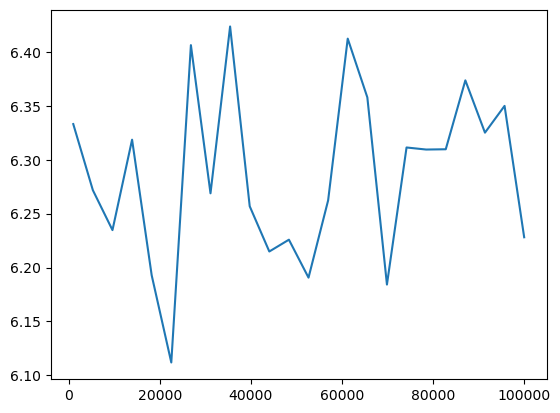

In [13]:
import matplotlib.pyplot as plt
plt.plot(cnt_trajectories, train_prices.mean(axis=1))